In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [3]:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
# Support vector machine linear classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

Z:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [10, 100, 1000],
              'max_depth': [2, 5, 10, 20]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [6]:
# Fit the model using the grid search estimator. 
# This will take the Random Forest model and try each combination of parameters
grid.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.7035398230088495, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.7394209354120267, total=   0.0s
[CV] max_depth=2, n_estimators=10 ....................................
[CV]  max_depth=2, n_estimators=10, score=0.7466367713004485, total=   0.0s
[CV] max_depth=2, n_estimators=100 ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, n_estimators=100, score=0.8163716814159292, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV]  max_depth=2, n_estimators=100, score=0.8485523385300668, total=   0.1s
[CV] max_depth=2, n_estimators=100 ...................................
[CV]  max_depth=2, n_estimators=100, score=0.8071748878923767, total=   0.1s
[CV] max_depth=2, n_estimators=1000 ..................................
[CV]  max_depth=2, n_estimators=1000, score=0.8185840707964602, total=   2.0s
[CV] max_depth=2, n_estimators=1000 ..................................
[CV]  max_depth=2, n_estimators=1000, score=0.8418708240534521, total=   2.0s
[CV] max_depth=2, n_estimators=1000 ..................................
[CV]  max_depth=2, n_estimators=1000, score=0.8183856502242153, total=   2.0s
[CV] max_depth=5, n_estimators=10 ....................................
[CV]  max_depth=5, n_estimators=10, score=0.8915929203539823, total=   0.0s
[CV] max_depth=5, n_estimators=10

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   37.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 100, 1000], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [7]:
# List the best parameters for this dataset
print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 1000}


In [8]:
# List the best score
print(grid.best_score_)

0.9710467706013363


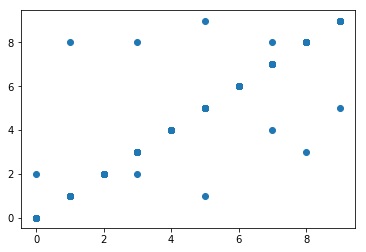

In [10]:
# Plot a scatterplot of predictions on X_test vs actual y_test values
predictions = grid.predict(X_test)
plt.scatter(predictions, y_test)